In [3]:
from utils import get_current_dir
import pandas as pd

inputpath = get_current_dir().parent / "data" / "artvis_cleaned.csv"
df = pd.read_csv(inputpath)

df = df.replace("null", pd.NA)

df["a.id"] = df["a.id"].astype(int)
df["a.firstname"] = df["a.firstname"].astype(str)
df["a.lastname"] = df["a.lastname"].astype(str)
df["a.gender"] = df["a.gender"].astype("category")
df["a.birthdate"] = pd.to_datetime(df["a.birthdate"], errors="coerce")
df["a.deathdate"] = pd.to_datetime(df["a.deathdate"], errors="coerce")
df["a.birthplace"] = df["a.birthplace"].astype("category")
df["a.deathplace"] = df["a.deathplace"].astype("category")
df["a.nationality"] = df["a.nationality"].astype("category")
df["e.id"] = df["e.id"].astype(int)
df["e.title"] = df["e.title"].astype(str)
df["e.venue"] = df["e.venue"].astype("category")
df["e.startdate"] = df["e.startdate"].astype(int)
df["e.type"] = df["e.type"].astype("category")
df["e.paintings"] = df["e.paintings"].astype(int)
df["e.country"] = df["e.country"].astype("category")
df["e.city"] = df["e.city"].astype("category")
df["e.latitude"] = df["e.latitude"].astype(float)
df["e.longitude"] = df["e.longitude"].astype(float)

df.head()

,a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
0,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,618,Exhibition of the Camden Town Group and Others,Public Art Galleries,1913,group,6,GB,Brighton,50.833333,-0.150000
1,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,720,The Second Exhibition of Works by Members of t...,Goupil Gallery,1915,group,4,GB,London,51.514248,-0.093145
2,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,729,Third Exhibition of Works by Members of the Lo...,Goupil Gallery,1915,group,5,GB,London,51.514248,-0.093145
3,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,650,The First Exhibition of Works by Members of Th...,Goupil Gallery,1914,group,5,GB,London,51.514248,-0.093145
4,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,680,Twentieth Century Art. A Review of Modern Move...,Whitechapel Art Gallery,1914,group,3,GB,London,51.514248,-0.093145


In [4]:
print(df.head())
for col in df.columns:
    print(f"column: {col}, type: {df[col].dtype}, unique values: {df[col].nunique()}")

   a.id      a.firstname a.lastname a.gender a.birthdate a.deathdate  \
0     1  William Bernard     Adeney        M  1878-01-01  1966-01-01   
1     1  William Bernard     Adeney        M  1878-01-01  1966-01-01   
2     1  William Bernard     Adeney        M  1878-01-01  1966-01-01   
3     1  William Bernard     Adeney        M  1878-01-01  1966-01-01   
4     1  William Bernard     Adeney        M  1878-01-01  1966-01-01   

  a.birthplace a.deathplace a.nationality  e.id  \
0       London       London            GB   618   
1       London       London            GB   720   
2       London       London            GB   729   
3       London       London            GB   650   
4       London       London            GB   680   

                                             e.title                  e.venue  \
0     Exhibition of the Camden Town Group and Others     Public Art Galleries   
1  The Second Exhibition of Works by Members of t...           Goupil Gallery   
2  Third Exhibiti

# Seaborn

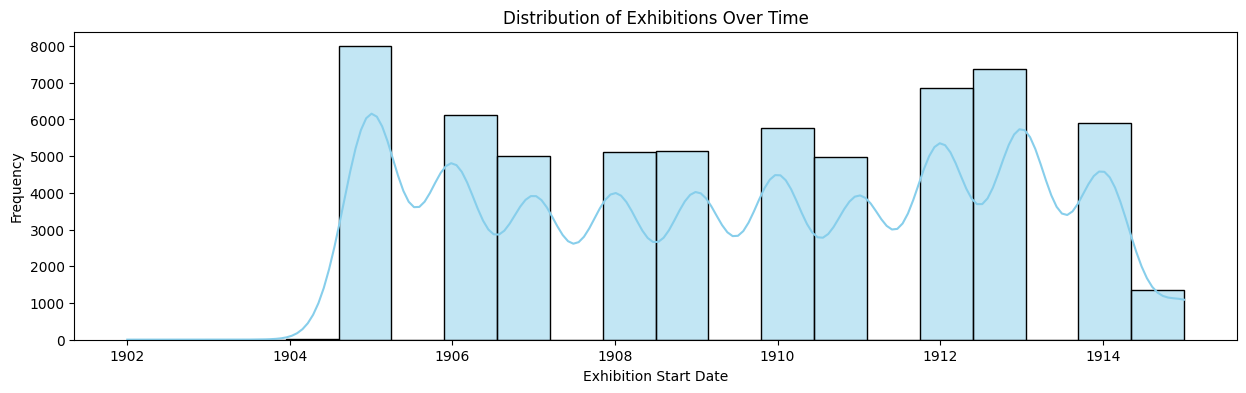

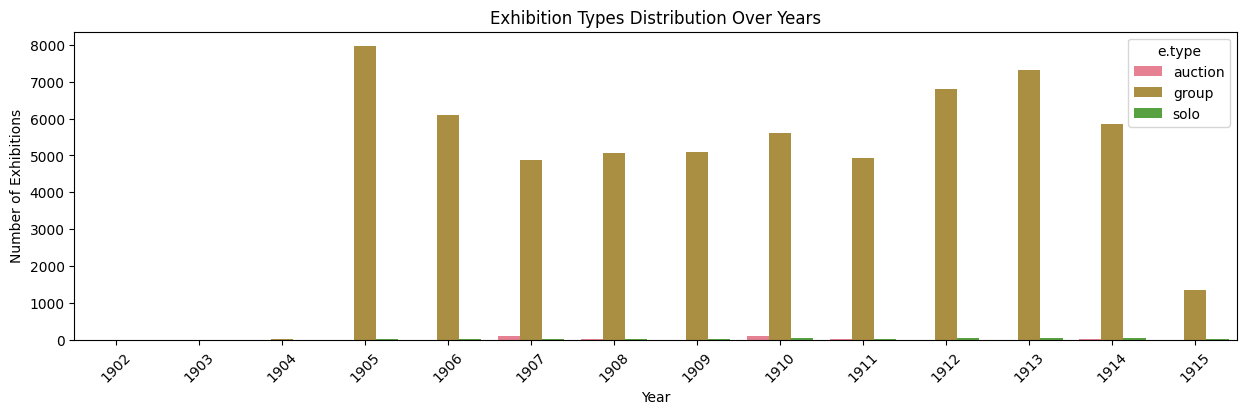

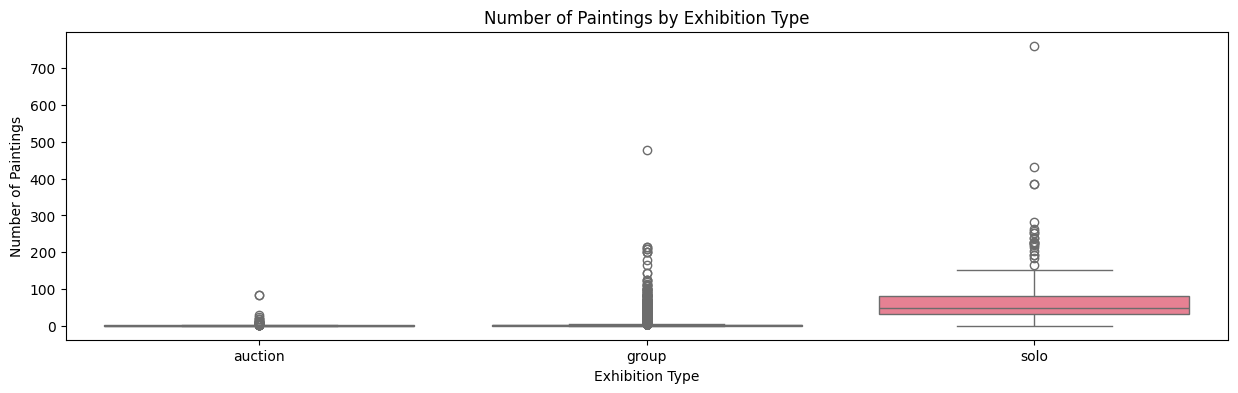

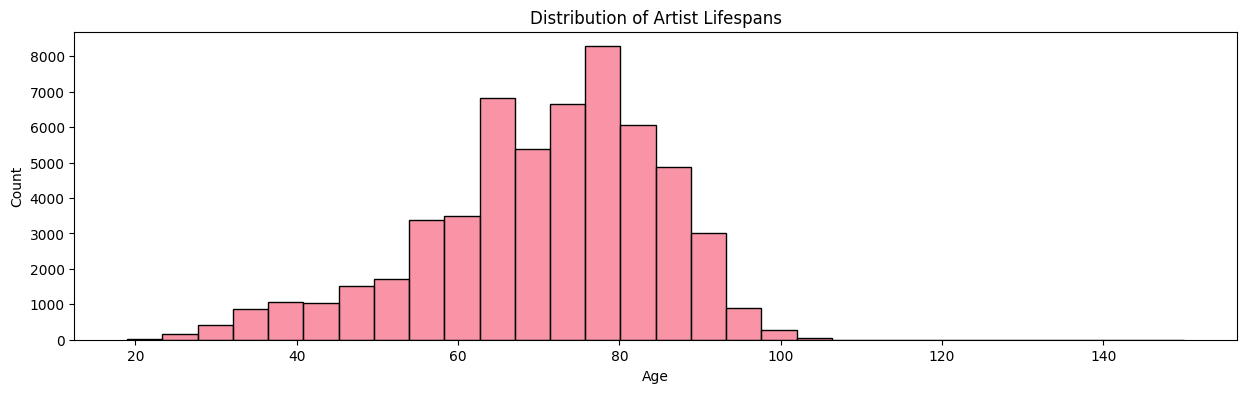

In [5]:
import seaborn as sns
import plotnine as p9
import altair as alt
import pandas as pd
from plotnine import *
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
alt.data_transformers.disable_max_rows()

plt.figure(figsize=(15, 4))
sns.histplot(data=df, x='e.startdate', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Exhibitions Over Time')
plt.xlabel('Exhibition Start Date')
plt.ylabel('Frequency')
plt.show()

sns.set_palette("husl")
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='e.startdate', hue='e.type')
plt.title('Exhibition Types Distribution Over Years')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Exhibitions')
plt.show()

plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x='e.type', y='e.paintings')
plt.title('Number of Paintings by Exhibition Type')
plt.xlabel('Exhibition Type')
plt.ylabel('Number of Paintings')
plt.show()


plt.figure(figsize=(15, 4))
def calculate_age(birth, death):
    birth_year = pd.to_datetime(birth).year
    death_year = pd.to_datetime(death).year
    return death_year - birth_year
df['age'] = df.apply(lambda x: calculate_age(x['a.birthdate'], x['a.deathdate']), axis=1)
sns.histplot(data=df, x='age', bins=30)
plt.title('Distribution of Artist Lifespans')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# P9

/var/folders/p6/sy85mkz13lsffnvz7237y4340000gn/T/ipykernel_90575/939507177.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


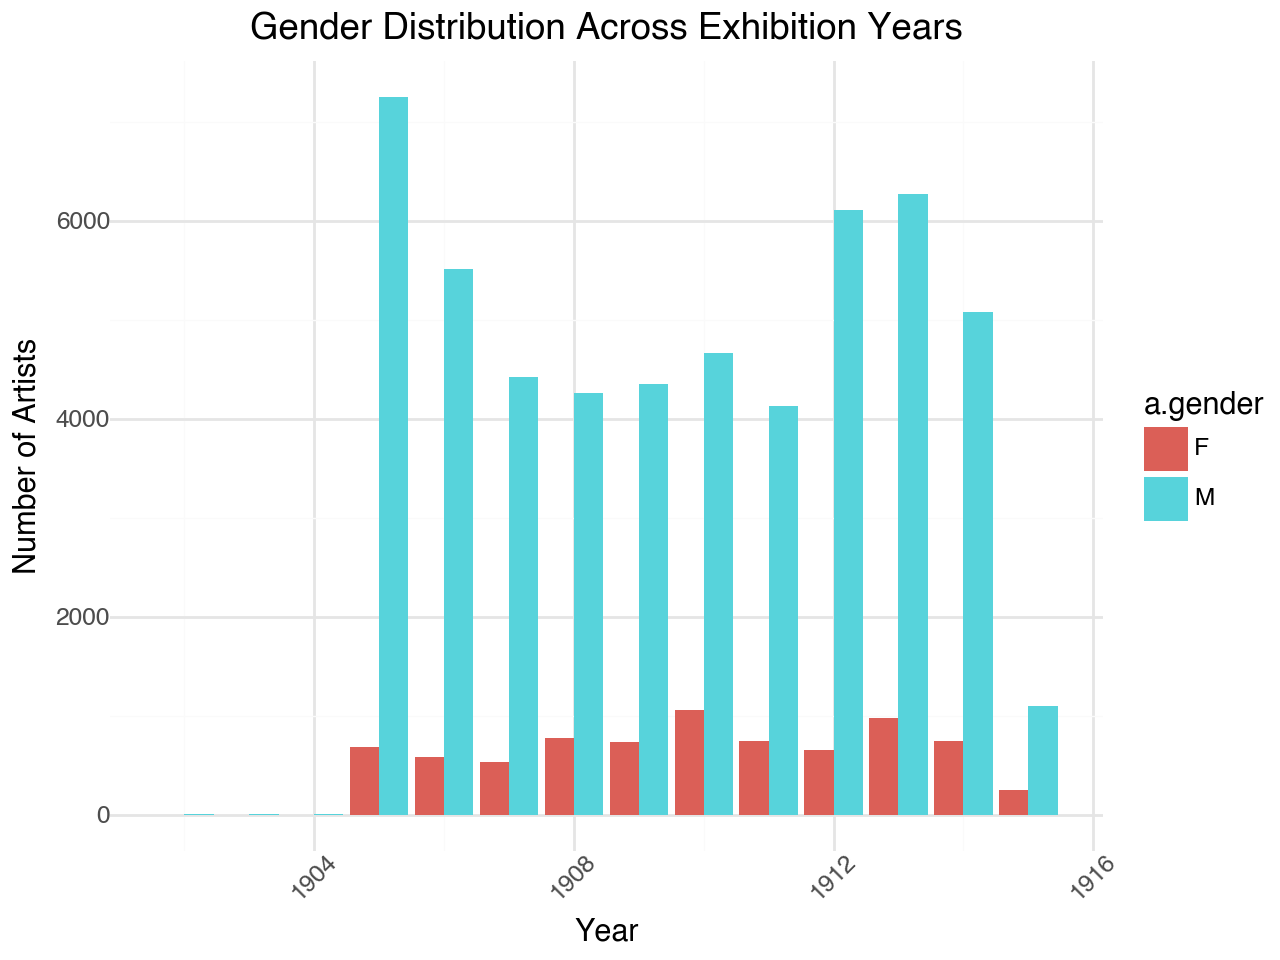

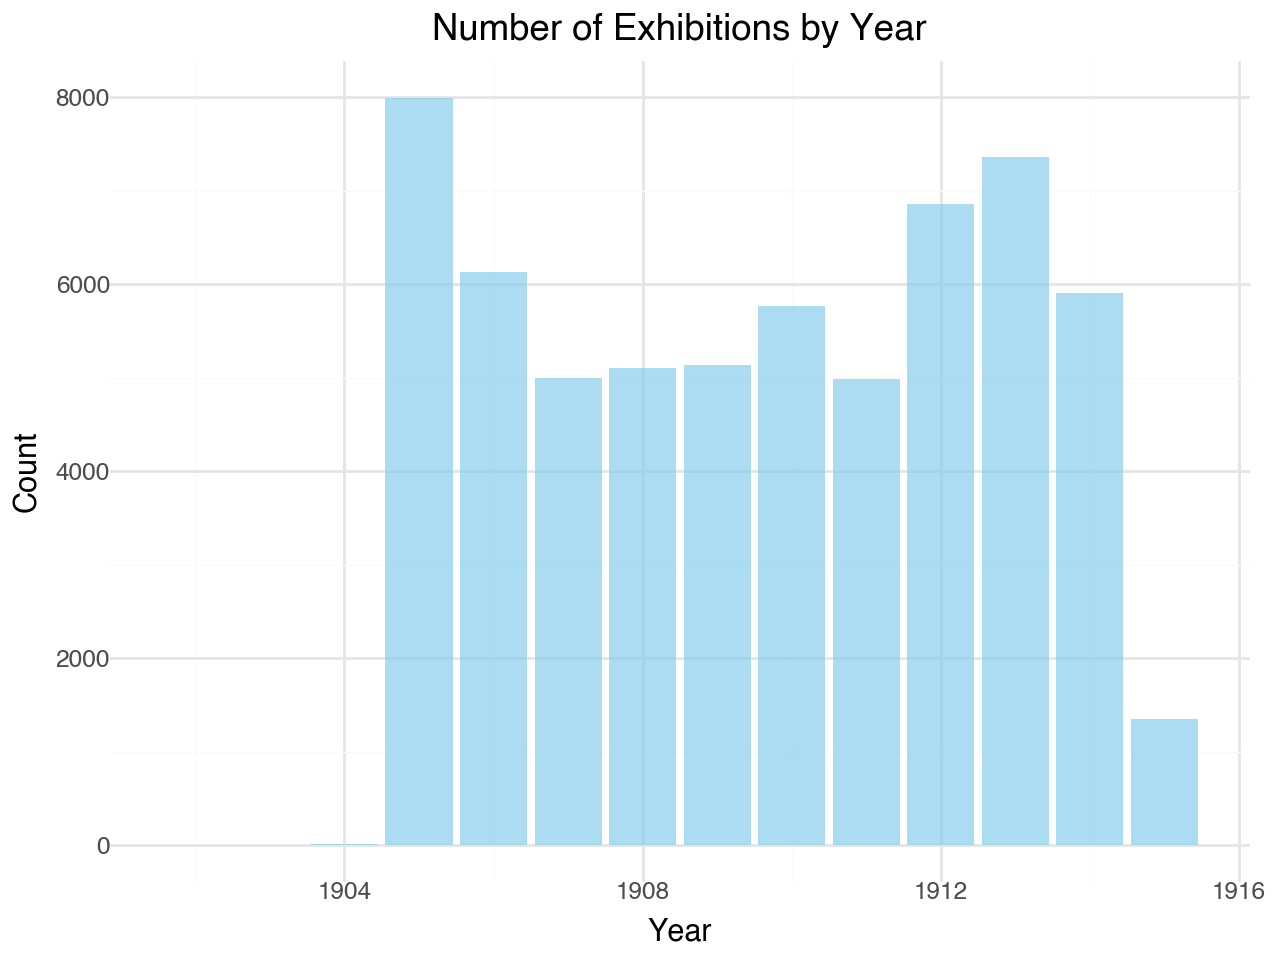

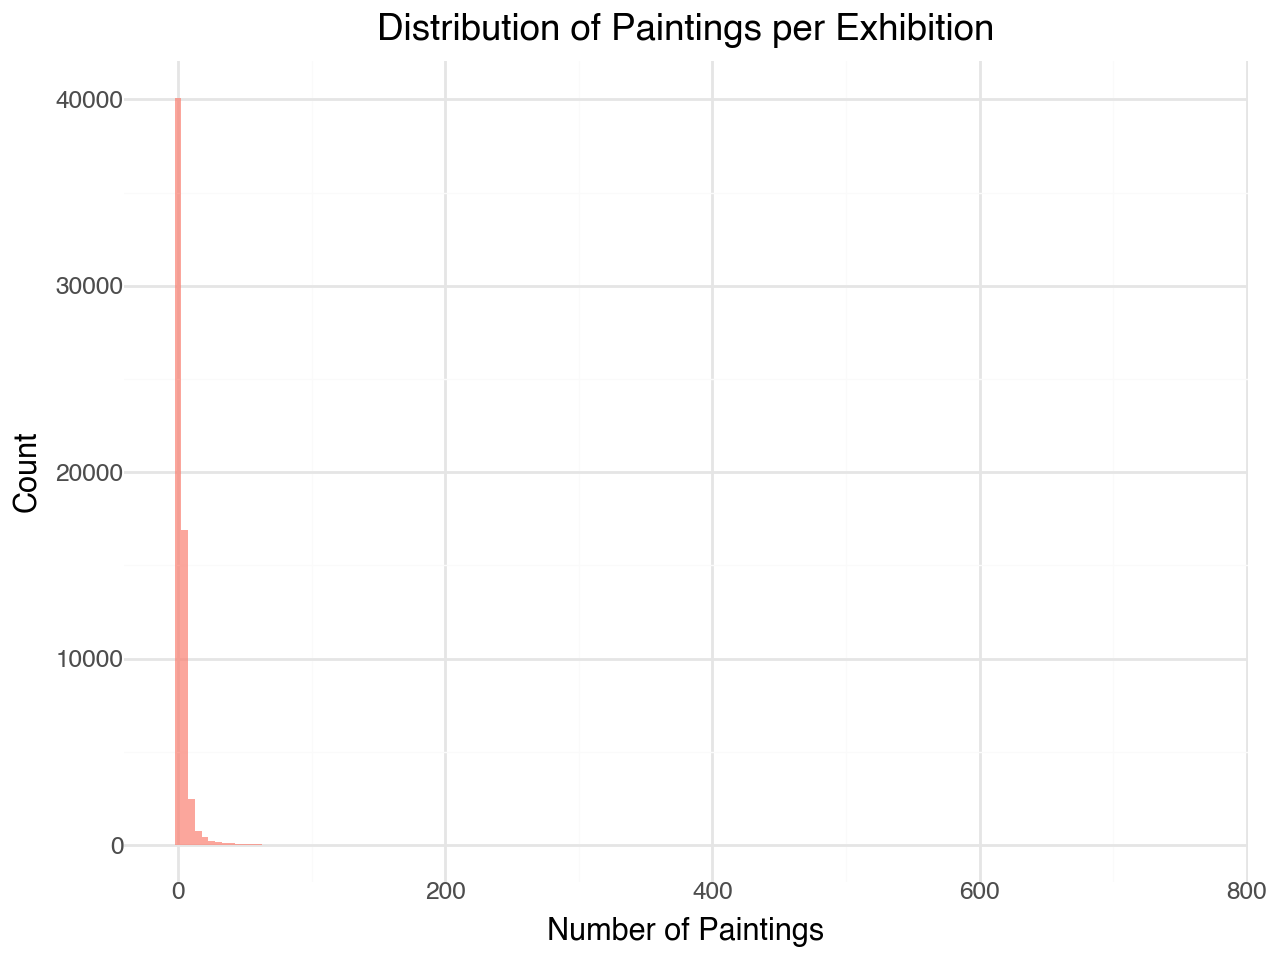

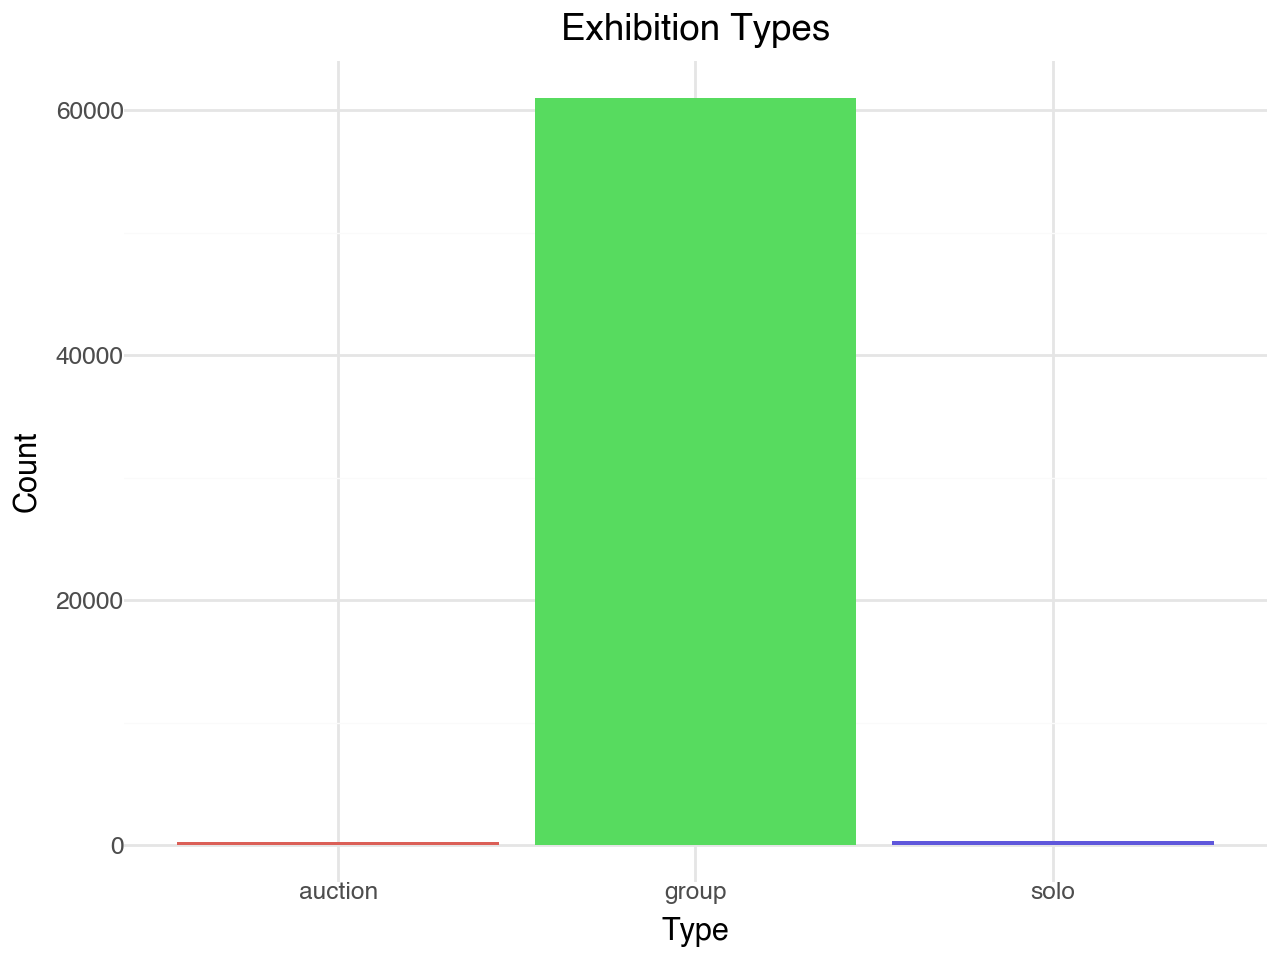

/Users/sueszli/dev/artviz/.venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 237 rows containing missing values.


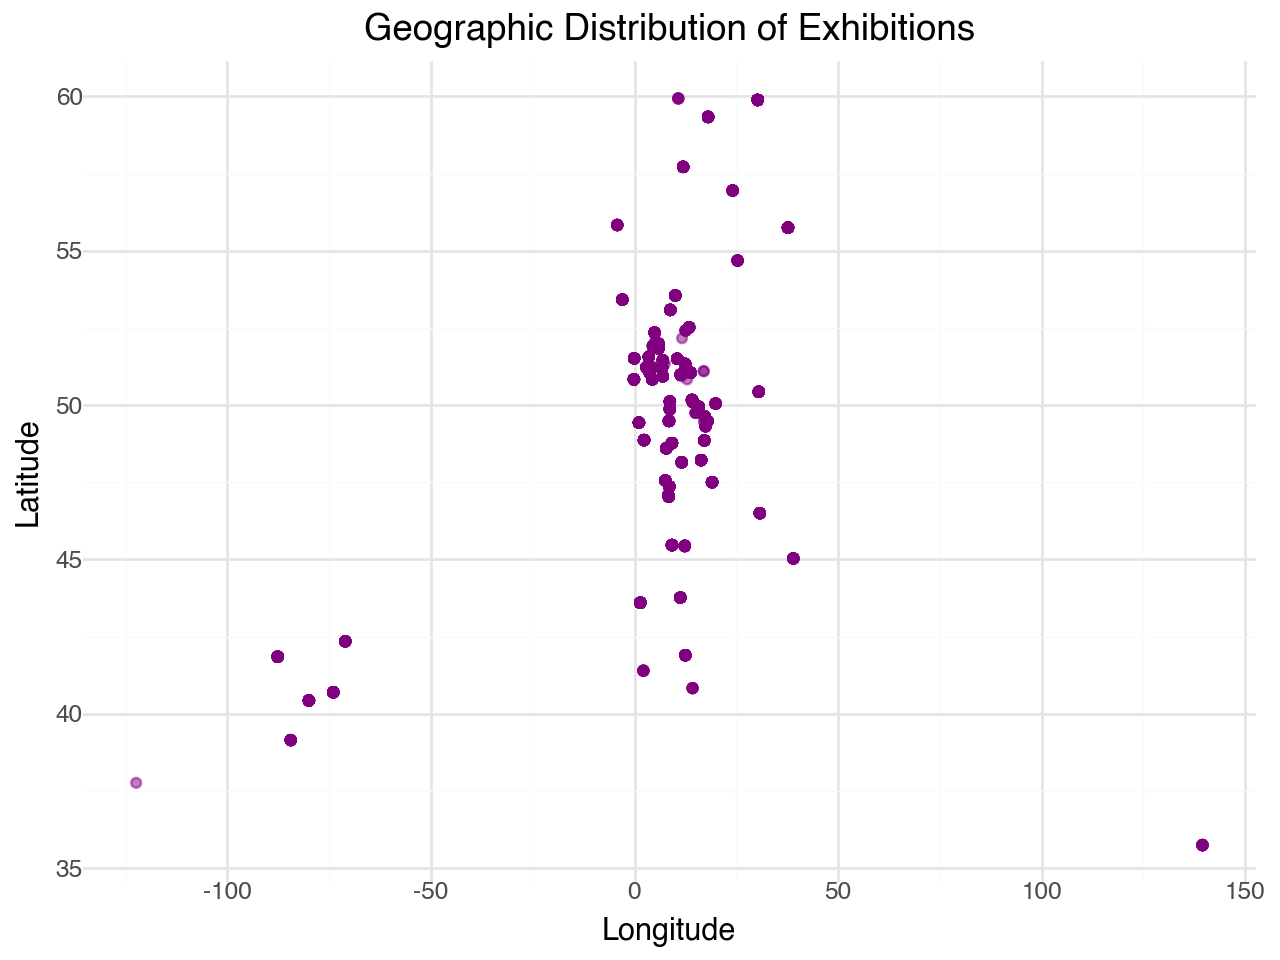

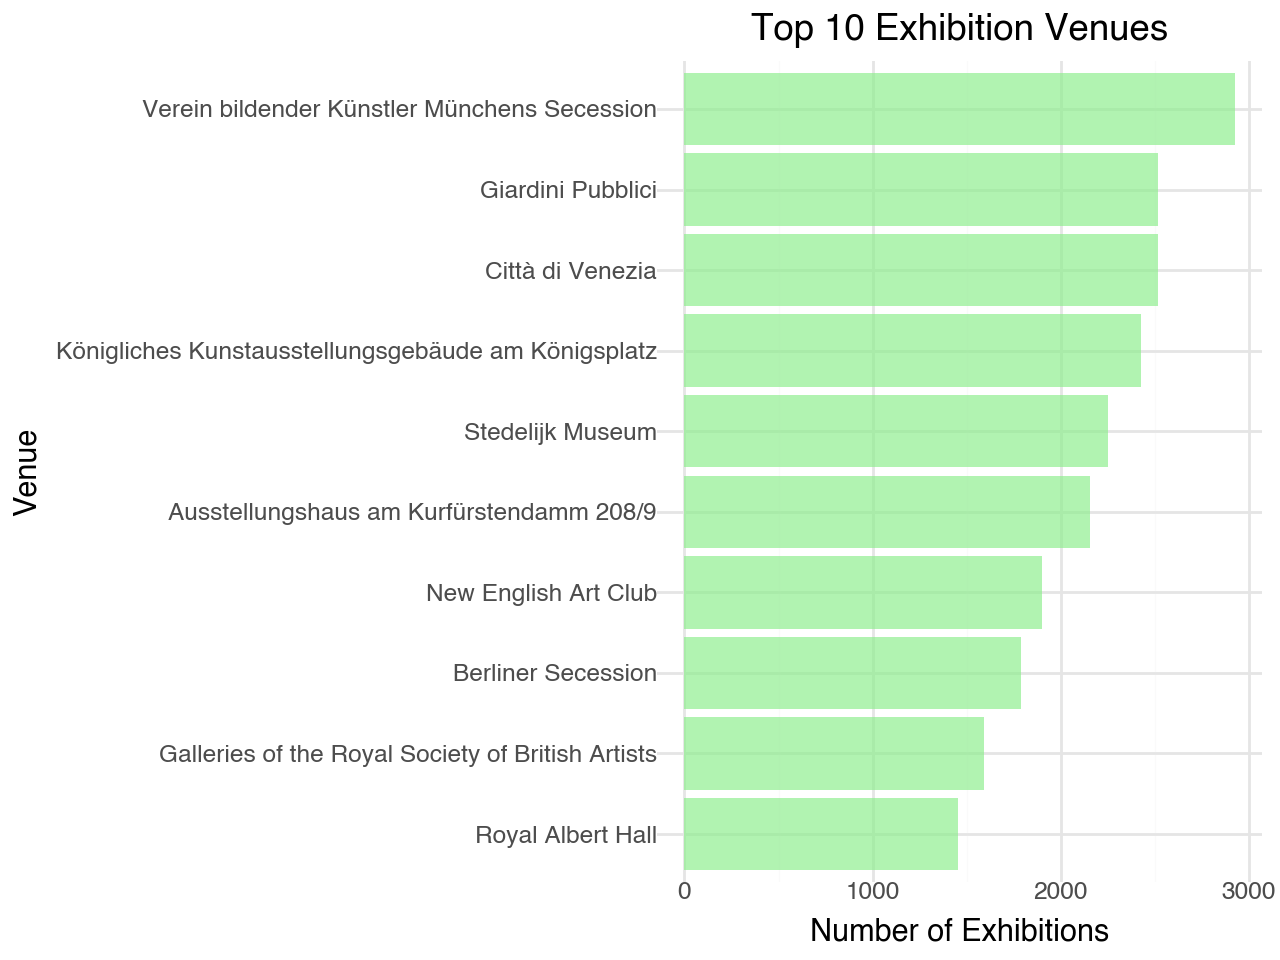

In [6]:
gender_counts = df.groupby(['e.startdate', 'a.gender']).size().reset_index(name='count')
(
    p9.ggplot(gender_counts, p9.aes(x='e.startdate', y='count', fill='a.gender')) +
    p9.geom_bar(stat='identity', position='dodge') +
    p9.theme_minimal() +
    p9.labs(title='Gender Distribution Across Exhibition Years', x='Year', y='Number of Artists') +
    p9.theme(axis_text_x=p9.element_text(angle=45))
).show()

(
    ggplot(df, aes(x='e.startdate')) +
    geom_bar(fill='skyblue', alpha=0.7) +
    labs(title='Number of Exhibitions by Year', x='Year', y='Count') +
    theme_minimal()
).show()

(
    ggplot(df, aes(x='e.paintings')) +
    geom_histogram(binwidth=5, fill='salmon', alpha=0.7) +
    labs(title='Distribution of Paintings per Exhibition', x='Number of Paintings', y='Count') +
    theme_minimal()
).show()

(
    ggplot(df, aes(x='e.type', fill='e.type')) +
    geom_bar() +
    labs(title='Exhibition Types', x='Type', y='Count') +
    theme_minimal() +
    theme(legend_position='none')
).show()

(
    ggplot(df, aes(x='e.longitude', y='e.latitude')) +
    geom_point(alpha=0.5, color='purple') +
    labs(title='Geographic Distribution of Exhibitions', x='Longitude', y='Latitude') +
    theme_minimal()
).show()

venue_counts = df['e.venue'].value_counts().head(10).reset_index()
venue_counts.columns = ['venue', 'count']
(
    ggplot(venue_counts, aes(x='reorder(venue, count)', y='count')) +
    geom_bar(stat='identity', fill='lightgreen', alpha=0.7) +
    coord_flip() +
    labs(title='Top 10 Exhibition Venues', x='Venue', y='Number of Exhibitions') +
    theme_minimal()
).show()

# Altair

In [7]:
nationality_data = df['a.nationality'].value_counts().head(10).reset_index()
nationality_data.columns = ['nationality', 'count']
nationality_chart = alt.Chart(nationality_data).mark_bar().encode(
    x='count',
    y=alt.Y('nationality', sort='-x'),
    tooltip=['nationality', 'count']
).properties(
    width=600,
    height=300,
    title='Top 10 Artist Nationalities'
)
nationality_chart.show()

alt.Chart(...)

In [8]:
# first do some basic plots with matplotlib


# https://altair-viz.github.io/ -> check out: linking, brushing
# make sure to `alt.data_transformers.disable_max_rows()` for `maxrowserror`